In [1]:
import numpy as np 
import pandas as pd 
import os

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing

import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:

Location = r'../input/train.csv'
#df = pd.read_csv(Location)

### Task 1: Preprocessing
###### Function to read json attributes

In [ ]:
import os
import json
from pandas.io.json import json_normalize

def load_df(csv_path='../input/ga-customer-revenue-prediction/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df


###### At First load data and convert data from json to different features

In [ ]:
df_train = load_df()

In [ ]:
df_train.head()

In [ ]:
null_count = df_train.isna().sum()
null_count

In [ ]:
def plot_nullValues(count,column):


    fig, ax = plt.subplots()

    # Example data
    X = column
    y_pos = np.arange(len(X))
    Y = count


    ax.barh(y_pos, Y, align='center',
            color='green', ecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(X)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Null Count')
    ax.set_title('Null count for columns')

    plt.show()

In [ ]:
def preprocess(df, train):
    if(train):
        df_train["totals.transactionRevenue"].fillna(0, inplace=True)
    df["totals.pageviews"].fillna(0, inplace=True)
    
    null_count = df.isna().sum()
    column = []
    count = []
    for i in range(len(null_count)):
        if(null_count[i]>0):
            count.append(null_count[i])
            column.append(null_count.keys()[i])
            
    plot_nullValues(count,column)
    
    return column

    
    

For now, I am dropping all the attributes with null values. I will come back to this again later


In [ ]:
null_columns =  preprocess(df_train,1)
#print(null_columns)
df_train = df_train.drop(null_columns,axis=1)
const_cols = [c for c in df_train.columns if df_train[c].nunique(dropna=False)==1 ]
df_train = df_train.drop(const_cols,axis=1)


In [ ]:
df_train.shape

In [ ]:
df_train.dtypes

In [ ]:
for col in ['totals.transactionRevenue','totals.hits','totals.pageviews']:
    df_train[col]=df_train[col].astype("float")

In [ ]:
df_train.to_csv("preprocessed_training.csv", index=False)

### Load preprocessed data

In [2]:

Location = r'preprocessed_training.csv'
df_train = pd.read_csv(Location)

/home/tonmoy/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
df_train.dtypes

channelGrouping               object
date                           int64
fullVisitorId                 object
sessionId                     object
visitId                        int64
visitNumber                    int64
visitStartTime                 int64
device.browser                object
device.deviceCategory         object
device.isMobile                 bool
device.operatingSystem        object
geoNetwork.city               object
geoNetwork.continent          object
geoNetwork.country            object
geoNetwork.metro              object
geoNetwork.networkDomain      object
geoNetwork.region             object
geoNetwork.subContinent       object
totals.hits                  float64
totals.pageviews             float64
totals.transactionRevenue    float64
trafficSource.campaign        object
trafficSource.medium          object
trafficSource.source          object
dtype: object

## Task 2: Plot graphs

In [4]:
import seaborn as sns

temp_df = df_train[['totals.transactionRevenue','totals.hits','totals.pageviews']]
corr = temp_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

ValueError: Arrays were different lengths: 3 vs 0

In [5]:
plot2_df = df_train[['fullVisitorId','date','totals.transactionRevenue']]
plot2_df.head()

,fullVisitorId,date,totals.transactionRevenue
0,1131660440785968503,20160902,0.0
1,377306020877927890,20160902,0.0
2,3895546263509774583,20160902,0.0
3,4763447161404445595,20160902,0.0
4,27294437909732085,20160902,0.0


In [6]:
def make_feature(df):
    
    month = []
    year = []
    
    for index, row in df.iterrows():
        # Calculate year, month, date
        year_val = str(row['date'])[:4]
        month_val = str(row['date'])[4:6]
        year.append(year_val)
        month.append(month_val)
#         print(year_val,month_val)
                
#         if(index == 5):
#             break

    df['month'] = month
    df['year'] = year
    #print(len(month))
    
    return df

In [7]:
plot2_df = make_feature(plot2_df)

/home/tonmoy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/tonmoy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [8]:
plot2_df['year'].unique()

array(['2016', '2017'], dtype=object)

In [9]:
plot2_month_df = plot2_df[['month','totals.transactionRevenue']]

In [10]:
grouped = plot2_month_df.groupby(['month'])['totals.transactionRevenue'].mean().reset_index()

#grouped = grouped['totals.transactionRevenue'].agg(np.mean)
grouped.head(13)

,month,totals.transactionRevenue
0,01,1.512935e+06
1,02,1.748722e+06
2,03,1.872764e+06
3,04,2.365533e+06
4,05,1.861857e+06
5,06,1.912131e+06
6,07,1.733684e+06
7,08,2.107890e+06
8,09,1.774288e+06
9,10,1.162278e+06


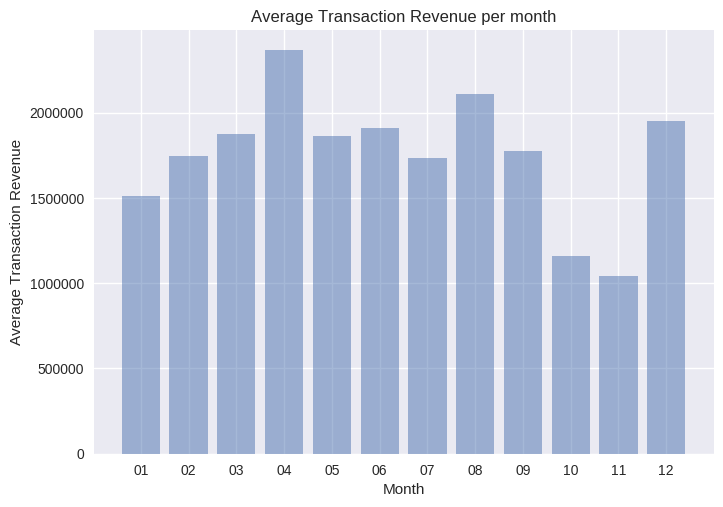

In [11]:
objects = grouped['month']
y_pos = np.arange(len(objects))
performance = grouped['totals.transactionRevenue']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average Transaction Revenue')
plt.xlabel('Month')
plt.title('Average Transaction Revenue per month')
 
plt.show()

In [12]:
plot3_continent_df = df_train[['geoNetwork.continent','totals.transactionRevenue']]
grouped = plot3_continent_df.groupby(['geoNetwork.continent'])['totals.transactionRevenue'].mean().reset_index()


grouped.head(13)

,geoNetwork.continent,totals.transactionRevenue
0,(not set),5.243733e+05
1,Africa,5.892004e+05
2,Americas,3.340916e+06
3,Asia,7.779167e+04
4,Europe,3.402247e+04
5,Oceania,1.191198e+05


In [13]:
grouped = grouped.drop(0)
grouped

,geoNetwork.continent,totals.transactionRevenue
1,Africa,5.892004e+05
2,Americas,3.340916e+06
3,Asia,7.779167e+04
4,Europe,3.402247e+04
5,Oceania,1.191198e+05


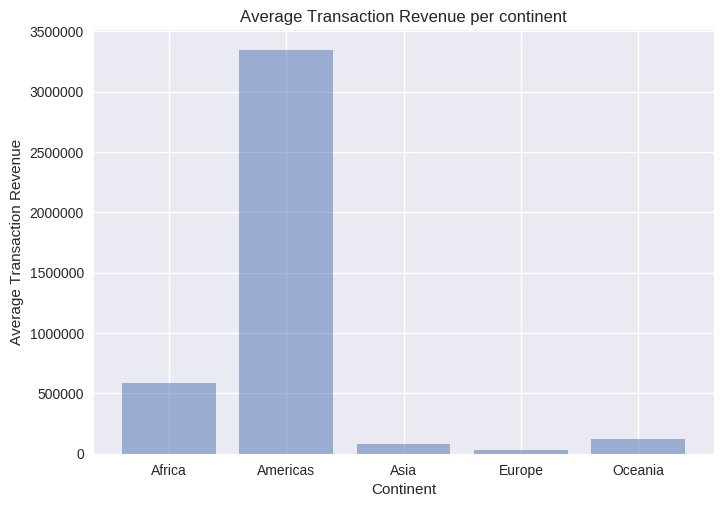

In [14]:
objects = grouped['geoNetwork.continent']
y_pos = np.arange(len(objects))
performance = grouped['totals.transactionRevenue']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average Transaction Revenue')
plt.xlabel('Continent')
plt.title('Average Transaction Revenue per continent')
 
plt.show()

## Task 3: Clustering

In [15]:
from sklearn import preprocessing

In [16]:
df_train['geoNetwork.country'].unique()

array(['Turkey', 'Australia', 'Spain', 'Indonesia', 'United Kingdom',
       'Italy', 'Pakistan', 'Austria', 'Netherlands', 'India', 'France',
       'Brazil', 'China', 'Singapore', 'Argentina', 'Poland', 'Germany',
       'Canada', 'Thailand', 'Hungary', 'Malaysia', 'Denmark', 'Taiwan',
       'Russia', 'Nigeria', 'Belgium', 'South Korea', 'Chile', 'Ireland',
       'Philippines', 'Greece', 'Mexico', 'Montenegro', 'United States',
       'Bangladesh', 'Japan', 'Slovenia', 'Czechia', 'Sweden',
       'United Arab Emirates', 'Switzerland', 'Portugal', 'Peru',
       'Hong Kong', 'Vietnam', 'Sri Lanka', 'Serbia', 'Norway', 'Romania',
       'Kenya', 'Ukraine', 'Israel', 'Slovakia', '(not set)', 'Lithuania',
       'Puerto Rico', 'Bosnia & Herzegovina', 'Croatia', 'South Africa',
       'Paraguay', 'Botswana', 'Colombia', 'Uruguay', 'Algeria', 'Finland',
       'Guatemala', 'Egypt', 'Malta', 'Bulgaria', 'New Zealand', 'Kuwait',
       'Uzbekistan', 'Saudi Arabia', 'Cyprus', 'Estonia', 'Cô

In [17]:
cluster_df = df_train[['geoNetwork.country','visitNumber','totals.hits','totals.pageviews','totals.transactionRevenue']]

In [18]:
cluster_df.head()

,geoNetwork.country,visitNumber,totals.hits,totals.pageviews,totals.transactionRevenue
0,Turkey,1,1.0,1.0,0.0
1,Australia,1,1.0,1.0,0.0
2,Spain,1,1.0,1.0,0.0
3,Indonesia,1,1.0,1.0,0.0
4,United Kingdom,2,1.0,1.0,0.0


In [19]:
cluster_df['totals.transactionRevenue']=cluster_df['totals.transactionRevenue'].astype("float")
# grouped = cluster_df.groupby(['fullVisitorId','geoNetwork.country','geoNetwork.continent'])
cluster = cluster_df.groupby(['geoNetwork.country'])['totals.transactionRevenue','visitNumber','totals.hits','totals.pageviews'].sum().reset_index()

cluster.head()
#cluster = grouped['totals.transactionRevenue'].agg(np.sum)

/home/tonmoy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,geoNetwork.country,totals.transactionRevenue,visitNumber,totals.hits,totals.pageviews
0,(not set),769780000.0,1891,4533.0,3923.0
1,Afghanistan,0.0,61,138.0,117.0
2,Albania,0.0,608,996.0,909.0
3,Algeria,0.0,2243,3911.0,3487.0
4,American Samoa,0.0,1,1.0,1.0


In [20]:
cluster.shape

(222, 5)

In [21]:
cl_backup = cluster
#cluster = cl_backup

In [ ]:
# from sklearn.preprocessing import OneHotEncoder,LabelEncoder

# #cluster = pd.concat([cluster, pd.get_dummies(cluster['geoNetwork.city'])], axis=1)

# cluster = pd.concat([cluster, pd.get_dummies(cluster['geoNetwork.country'])], axis=1)



In [22]:
cluster = cluster.drop(['geoNetwork.country'],axis=1)
cluster.head()

,totals.transactionRevenue,visitNumber,totals.hits,totals.pageviews
0,769780000.0,1891,4533.0,3923.0
1,0.0,61,138.0,117.0
2,0.0,608,996.0,909.0
3,0.0,2243,3911.0,3487.0
4,0.0,1,1.0,1.0


In [23]:
from sklearn import preprocessing

x = cluster.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
cluster =  pd.DataFrame(x_scaled,columns = ['totals.transactionRevenue','visitNumber','totals.hits','totals.pageviews'])
cluster.head()

,totals.transactionRevenue,visitNumber,totals.hits,totals.pageviews
0,0.00053,0.001581,0.001825,0.001930
1,0.00000,0.000050,0.000055,0.000057
2,0.00000,0.000508,0.000401,0.000447
3,0.00000,0.001876,0.001574,0.001716
4,0.00000,0.000000,0.000000,0.000000


In [40]:
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans


# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
X = cluster
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

kmeans = pd.DataFrame(labels)
#X.insert((X.shape[1]),'kmeans',kmeans)
C

array([[  1.23317414e-04,   1.20730921e-03,   1.20564623e-03,
          1.27977304e-03],
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00],
       [  2.06921080e-03,   2.74117109e-02,   2.50826696e-02,
          2.65139537e-02]])

In [41]:
#wh1.insert(0,'Country',wh.iloc[:,0])
#wh1.iloc[:,[0,9,10,11,12]]
data = [dict(type='choropleth',
             locations = cl_backup['geoNetwork.country'],
             locationmode = 'country names',
             z = labels,
             text = cl_backup['geoNetwork.country'],
             colorbar = {'title':'Cluster Group'})]
layout = dict(title='Clustering of Countries based on K-Means',
              geo = dict(showframe = False,
                        showcoastlines = False,
                        projection = dict(type = 'Mercator')))
fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(cluster.head(100000))
pca_2d = pca.transform(cluster.head(100000))

In [ ]:
# import matplotlib.pyplot as plt

# plt.scatter(pca_2d[:,0],pca_2d[:,1],c='green',s=20)
# plt.show()

In [ ]:
principalDf = pd.DataFrame(data = pca_2d
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, cl_backup[['geoNetwork.continent']]], axis = 1)


In [ ]:
finalDf.head()

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
# Major ticks every 20, minor ticks every 5
major_ticks1 = np.arange(-0.1, 0.4, 0.1)
major_ticks2 = np.arange(-0.1, 0.2, 0.1)
#minor_ticks = np.arange(0, 101, 5)

ax.set_xticks(major_ticks1)
# ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks2)
ax.grid(which='both')
# ax.set_yticks(minor_ticks, minor=True)
ax.set_xlim([-0.1, 0.4])
ax.set_ylim([-0.1, 0.2])
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Asia', 'Oceania', 'Europe', 'Americas', 'Africa', '(not set)']
colors = ['r', 'g', 'b', '#ff0066','#ffcc66','#ffff00']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['geoNetwork.continent'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 20)
ax.legend(targets)
ax.grid()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans


# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
X = principalDf
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
C
kmeans = pd.DataFrame(labels)
#X.insert((X.shape[1]),'kmeans',kmeans)

In [ ]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(X['principal component 1'],X['principal component 2'],
                     c=kmeans[0],s=20)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Principle Component 1')
ax.set_ylabel('Principle Component 2')
major_ticks1 = np.arange(-0.1, 0.4, 0.1)
major_ticks2 = np.arange(-0.1, 0.2, 0.1)
#minor_ticks = np.arange(0, 101, 5)

ax.set_xticks(major_ticks1)
# ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks2)
ax.grid(which='both')
# ax.set_yticks(minor_ticks, minor=True)
ax.set_xlim([-0.1, 0.4])
ax.set_ylim([-0.1, 0.2])
#plt.colorbar(scatter)

### Task 4 : Score Function

In [ ]:
df_train.head()

In [ ]:
grouped = df_train.groupby("fullVisitorId")['totals.transactionRevenue'].sum().reset_index()

Customer with lowest revenue production

In [ ]:
grouped = grouped.sort_values('totals.transactionRevenue')
grouped.head(10)

Customer with highest revenue production

In [ ]:
grouped = grouped.sort_values('totals.transactionRevenue',ascending=False)
grouped.head(10)

In [ ]:
finalDf = grouped[['fullVisitorId','visitNumber', 'totals.hits', 'totals.pageviews', 'totals.transactionRevenue']]
finalDf.head()

In [ ]:
grouped.head()

In [ ]:
from sklearn import preprocessing

x = finalDf[['visitNumber', 'totals.hits', 'totals.pageviews']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
finalDf = pd.concat([finalDf, pd.DataFrame(x_scaled,columns = ['NL.visitNumber','NL.totals.hits','NL.totals.pageviews'])],axis=1)
finalDf.head()

In [ ]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [ ]:
score = []

for index, row in finalDf.iterrows():
    # Calculate year, month, date
    visits = float(row['NL.visitNumber'])
    hits = float(row['NL.totals.hits'])
    views = float(row['NL.totals.pageviews'])
    x = visits+hits+views
    score.append(sigmoid(x))


finalDf['score'] = score
finalDf.head()
#print(len(month))
    
  

In [ ]:
finalDf = finalDf.sort_values('score',ascending= False)
finalDf.head(10)

In [ ]:
grouped = df_train.groupby("fullVisitorId").sum().reset_index()
grouped = grouped.sort_values('totals.transactionRevenue',ascending= False)
grouped.head(10)

### Task 5 : External Dataset

https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?end=2017&start=2016

In [ ]:
import pandas as pd
Location = r'../input/gdppcapita/GDP_per_capita.csv'
df = pd.read_csv(Location)
df = df.drop(['Country Code'],axis=1)
df.head()

In [ ]:
df = df.set_index('Country Name')

In [ ]:
df = df.to_dict()

In [ ]:
df['2016']['Brazil']

In [ ]:
extra_df = make_feature(df_train)

In [ ]:
extra_df.shape

In [ ]:
gdppc = []

for index, row in extra_df.iterrows():
    # Calculate year, month, date
    year = str(row['year'])
    country = str(row['geoNetwork.country'])
    #temp = df.loc[(df['Country Name'] == country)]
    try:
        gdp = df[year][country]
    except:
        gdp = float('NaN')
        
    gdppc.append(gdp)
    #month.append(month_val)
#         print(year_val,month_val)

#         if(index == 5):
#             break

# df['month'] = month
# df['year'] = year
#print(gdppc)

In [ ]:
print(len(gdppc))

In [ ]:
extra_df['gdp_p_c'] = gdppc

In [ ]:
extra_df = extra_df.drop('date',axis=1)
extra_df.head()

### Task 6: Build Model

In [ ]:
test_df = load_df("../input/ga-customer-revenue-prediction/test.csv")
test_df.shape

In [ ]:
null_count = test_df.isna().sum()
null_count

In [ ]:
null_columns =  preprocess(test_df,0)
#print(null_columns)
test_df = test_df.drop(null_columns,axis=1)
const_cols = [c for c in test_df.columns if test_df[c].nunique(dropna=False)==1 ]
test_df = test_df.drop(const_cols,axis=1)

In [ ]:
print("Variables not in test but in train : ", set(df_train.columns).difference(set(test_df.columns)))

In [ ]:
for col in ['totals.hits','totals.pageviews']:
    test_df[col]=test_df[col].astype("float")

In [ ]:
test_df.to_csv("preprocessed_test.csv", index=False)

In [ ]:
test_df.dtypes

In [ ]:
test_df_backup = test_df
train_df_backup = df_train

In [ ]:
df_train = df_train.drop(['visitId','sessionId'],axis=1)
test_df = test_df.drop(['visitId','sessionId'],axis=1)

In [ ]:
df_train.head()

In [ ]:
df_train = make_feature(df_train)
test_df = make_feature(test_df)

In [ ]:
for col in ['month','year']:
    test_df[col]=test_df[col].astype("int")
    df_train[col]=df_train[col].astype("int")

In [ ]:
# label encode the categorical variables and convert the numerical variables to float
categorical_feature = ["channelGrouping", "device.browser", 
            "device.deviceCategory", "device.isMobile" , "device.operatingSystem", 
            "geoNetwork.city", "geoNetwork.continent", 
            "geoNetwork.country", "geoNetwork.metro",
            "geoNetwork.networkDomain", "geoNetwork.region", 
            "geoNetwork.subContinent", "trafficSource.campaign",
            "trafficSource.medium", "trafficSource.source"]

In [ ]:
for feature in categorical_feature:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(df_train[feature].values.astype('str'))+list(test_df[feature].values.astype('str')))
    df_train[feature] = lbl.transform(list(df_train[feature].values.astype('str')))
    test_df[feature] = lbl.transform(list(test_df[feature].values.astype('str')))

In [ ]:
#import datetime

train_y = df_train["totals.transactionRevenue"].values
train_id = df_train["fullVisitorId"].values
test_id = test_df["fullVisitorId"].values


# Split the train dataset into development and valid based on time 
dev_df = df_train[df_train['month']>=2]
val_df = df_train[df_train['month']<3]
dev_y = np.log1p(dev_df["totals.transactionRevenue"].values)
val_y = np.log1p(val_df["totals.transactionRevenue"].values)

# dev_X = dev_df[cat_cols + num_cols] 
# val_X = val_df[cat_cols + num_cols] 
# test_X = test_df[cat_cols + num_cols] 

In [ ]:
df_train.dtypes

In [ ]:
dev_df = dev_df.drop(['date','fullVisitorId','totals.transactionRevenue'],axis=1)
val_df = val_df.drop(['date','fullVisitorId','totals.transactionRevenue'],axis=1)
test_df = test_df.drop(['date','fullVisitorId'],axis=1)

In [ ]:
dev_df = dev_df.drop(['visitStartTime'],axis=1)
val_df = val_df.drop(['visitStartTime'],axis=1)
test_df = test_df.drop(['visitStartTime'],axis=1)

In [ ]:
# custom function to run light gbm model
import lightgbm as lgb
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse", 
        "num_leaves" : 30,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return pred_test_y, model, pred_val_y

# Training the model #
pred_test, model, pred_val = run_lgb(dev_df, dev_y, val_df, val_y, test_df)

In [ ]:
# from sklearn import metrics
# pred_val[pred_val<0] = 0
# val_pred_df = pd.DataFrame({"fullVisitorId":val_df["fullVisitorId"].values})
# val_pred_df["transactionRevenue"] = val_df["totals.transactionRevenue"].values
# val_pred_df["PredictedRevenue"] = np.expm1(pred_val)
# #print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))
# val_pred_df = val_pred_df.groupby("fullVisitorId")["transactionRevenue", "PredictedRevenue"].sum().reset_index()
# print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))

In [ ]:
# sub_df = pd.DataFrame({"fullVisitorId":test_id})
# pred_test[pred_test<0] = 0
# sub_df["PredictedLogRevenue"] = np.expm1(pred_test)
# sub_df = sub_df.groupby("fullVisitorId")["PredictedLogRevenue"].sum().reset_index()
# sub_df.columns = ["fullVisitorId", "PredictedLogRevenue"]
# sub_df["PredictedLogRevenue"] = np.log1p(sub_df["PredictedLogRevenue"])
# sub_df.to_csv("baseline_lgb.csv", index=False)